In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost==0.72

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - xgboost==0.72


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    xgboost-0.72               |   py36hfc679d8_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following NEW packages will be INSTALLED:

    xgboost:         0.72-py36hfc679d8_1 conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-0                     --> 2019.9.11-hecc5488_0 conda-fo

In [105]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 90)

In [106]:
cols_loaded = pd.read_csv('columns.csv', header=None)

In [107]:
col_types = cols_loaded.set_index(0).rename(columns={1:'index1'}).to_dict()

In [108]:
X_train = pd.read_csv('train_prep.csv', header=None)
X_train.columns =  list(col_types['index1'].keys())
X_train.astype(col_types['index1'])
X_test = pd.read_csv('validation_prep.csv', header=None)
X_test.columns =  list(col_types['index1'].keys())
X_test.astype(col_types['index1'])

,SalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Grvl,Alley_Pave,Alley_no_info,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_no_info,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,12.524421,13.449359,10.851912,0.000000,4,0.000000,0.000000,0,0,697.0,0.000000,1,2,2,1966.0,14.484354,0,1424,1,22.713138,5.817080,0.000000,13,0.000000,0.000000,10,8.473163,6,6,11.28916,0.000000,12,697.0,10.679538,1966,1966,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,11.877576,14.213968,0.000000,0.000000,4,0.000000,0.000000,0,0,0.0,0.000000,2,2,2,1977.0,14.213968,0,779,2,19.189158,5.684507,0.000000,15,9.178051,0.000000,1,0.000000,4,5,0.00000,0.000000,0,0.0,0.000000,1977,1977,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,11.849405,12.382690,0.000000,0.000000,2,10.337416,0.000000,1,0,75.0,0.000000,0,1,1,1958.0,12.382690,0,970,1,20.023862,6.098626,0.000000,4,6.751853,0.000000,5,0.000000,4,6,0.00000,0.000000,10,588.0,0.000000,1958,1958,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,12.072547,12.462556,0.000000,0.000000,3,11.393133,6.512196,0,1,266.0,0.000000,0,2,2,1977.0,12.462556,0,926,1,21.707788,6.221214,0.000000,5,0.000000,0.000000,5,0.000000,5,5,0.00000,0.000000,10,1126.0,7.873203,1977,1977,2,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,11.940400,12.703313,0.000000,0.000000,2,12.359144,0.000000,2,0,0.0,0.000000,2,0,2,1979.0,12.703313,2,189,2,18.501410,5.802739,0.000000,15,8.823108,0.000000,8,0.000000,4,5,0.00000,0.000000,10,1086.0,7.020909,1979,1979,3,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
5,12.739641,12.934877,12.377472,0.000000,3,12.580152,0.000000,1,0,138.0,8.274266,1,2,3,1993.0,14.784658,1,719,1,20.085156,6.574447,0.000000,10,10.954955,0.000000,10,7.538898,4,7,0.00000,0.000000,13,1311.0,8.604063,1993,1994,2,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
6,11.925042,10.740974,10.740974,0.000000,2,0.000000,0.000000,0,0,600.0,0.000000,0,2,2,2004.0,12.645909,1,604,1,15.686252,4.492018,0.000000,2,0.000000,0.000000,8,7.774945,4,7,0.00000,0.000000,8,600.0,0.000000,2004,2005,4,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
7,12.211065,13.234258,0.000000,0.000000,3,3.530419,0.000000,0,0,1450.0,0.000000,0,2,3,2007.0,13.234258,0,931,1,19.425328,6.047664,0.000000,5,0.000000,0.000000,9,3.701973,4,8,0.00000,0.000000,11,1466.0,6.654950,2007,2007,3,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
8,11.589896,11.821770,9.945514,0.000000,3,10.897674,0.000000,0,0,0.0,7.020909,0,1,1,1994.0,12.959182,1,558,1

In [109]:
test = pd.read_csv('test_prep.csv', dtype=col_types['index1'])

In [110]:
test_ID = test['Id']
test.drop(['Id', 'SalePrice'], inplace=True, axis=1)
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Grvl,Alley_Pave,Alley_no_info,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_no_info,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,11.818680,0.000000,0.0,2,10.105326,7.397498,0,0,270.0,0.0,0,1,1,1961.0,11.818680,0,1,20.479373,6.221214,0.0,5,0.000000,0.000000,8,0.000000,5,5,0.0,7.020909,9,882.0,7.338607,1961,1961,4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,12.943735,0.000000,0.0,3,11.901094,0.000000,0,0,406.0,0.0,0,1,1,1958.0,12.943735,1,1,21.327220,6.244956,0.0,5,6.808145,20.777526,8,4.792130,5,6,0.0,0.000000,10,1329.0,9.672623,1958,1958,4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,11.916131,11.151348,0.0,3,11.476685,0.000000,0,0,137.0,0.0,1,2,2,1997.0,13.551272,1,1,21.196905,6.073289,0.0,10,0.000000,0.000000,5,4.697012,4,5,0.0,0.000000,10,928.0,8.232627,1997,1998,4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,11.910125,11.062536,0.0,3,10.749651,0.000000,0,0,324.0,0.0,1,2,2,1998.0,13.504453,1,1,19.865444,6.172972,0.0,10,3.858807,0.000000,8,4.792130,5,6,0.0,0.000000,11,926.0,9.459637,1998,1998,4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,12.833625,0.000000,0.0,2,8.720170,0.000000,0,0,1017.0,0.0,0,2,2,1992.0,12.833625,0,1,17.257255,5.093857,0.0,0,0.000000,0.000000,0,6.268453,4,8,0.0,7.397498,9,1280.0,0.000000,1992,1992,4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [111]:
y_train = X_train['SalePrice']
X_train.drop(['Id', 'SalePrice'], inplace=True, axis=1)
y_test = X_test['SalePrice']
X_test.drop(['Id', 'SalePrice'], inplace=True, axis=1)
# cols = list(train)
# print(cols)
# cols.insert(0, cols.pop(cols.index('SalePrice')))
# train = train.loc[:, cols]


In [112]:
# xgb1 = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=100, objective='reg:squarederror', silent=0)

xgb1 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6709,       
                        colsample_bynode=1, colsample_bytree=0.4124, eta=0.0411, gamma=0.0444,       
                        importance_type='gain', learning_rate=0.0411, max_delta_step=0,       
                        max_depth=3, min_child_weight=1.9324, missing=None, n_estimators=1591,       
                        n_jobs=1, nthread=None, num_round=1591, objective='reg:linear',       
                        random_state=77, reg_alpha=0.0866, reg_lambda=0.5339, scale_pos_weight=1,       
                        seed=None, silent=0, subsample=0.6804, verbosity=1, sketch_eps=0.03,
                       tweedie_variance_power=1.5)

In [113]:
xgb1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6709,
       colsample_bynode=1, colsample_bytree=0.4124, eta=0.0411,
       gamma=0.0444, importance_type='gain', learning_rate=0.0411,
       max_delta_step=0, max_depth=3, min_child_weight=1.9324,
       missing=None, n_estimators=1591, n_jobs=1, nthread=None,
       num_round=1591, objective='reg:linear', random_state=77,
       reg_alpha=0.0866, reg_lambda=0.5339, scale_pos_weight=1, seed=None,
       silent=0, sketch_eps=0.03, subsample=0.6804,
       tweedie_variance_power=1.5, verbosity=1)

In [114]:
xgb1.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:11.0554	validation_1-rmse:11.061
[1]	validation_0-rmse:10.6018	validation_1-rmse:10.6074
[2]	validation_0-rmse:10.1673	validation_1-rmse:10.1728
[3]	validation_0-rmse:9.75083	validation_1-rmse:9.75642
[4]	validation_0-rmse:9.35157	validation_1-rmse:9.35717
[5]	validation_0-rmse:8.96815	validation_1-rmse:8.97377
[6]	validation_0-rmse:8.60062	validation_1-rmse:8.60626
[7]	validation_0-rmse:8.24832	validation_1-rmse:8.25398
[8]	validation_0-rmse:7.91033	validation_1-rmse:7.91601
[9]	validation_0-rmse:7.58619	validation_1-rmse:7.59129
[10]	validation_0-rmse:7.27523	validation_1-rmse:7.27988
[11]	validation_0-rmse:6.9765	validation_1-rmse:6.98169
[12]	validation_0-rmse:6.69044	validation_1-rmse:6.69551
[13]	validation_0-rmse:6.41587	validation_1-rmse:6.42097
[14]	validation_0-rmse:6.15292	validation_1-rmse:6.15855
[15]	validation_0-rmse:5.90121	validation_1-rmse:5.90727
[16]	validation_0-rmse:5.65938	validation_1-rmse:5.66533
[17]	validation_0-rmse:5.42767	validation_1

[141]	validation_0-rmse:0.114043	validation_1-rmse:0.132697
[142]	validation_0-rmse:0.1133	validation_1-rmse:0.131906
[143]	validation_0-rmse:0.112637	validation_1-rmse:0.131414
[144]	validation_0-rmse:0.111957	validation_1-rmse:0.13076
[145]	validation_0-rmse:0.111334	validation_1-rmse:0.130231
[146]	validation_0-rmse:0.11069	validation_1-rmse:0.129786
[147]	validation_0-rmse:0.110166	validation_1-rmse:0.129205
[148]	validation_0-rmse:0.109704	validation_1-rmse:0.12884
[149]	validation_0-rmse:0.109216	validation_1-rmse:0.128155
[150]	validation_0-rmse:0.108715	validation_1-rmse:0.127817
[151]	validation_0-rmse:0.108342	validation_1-rmse:0.127455
[152]	validation_0-rmse:0.107866	validation_1-rmse:0.1269
[153]	validation_0-rmse:0.107426	validation_1-rmse:0.126389
[154]	validation_0-rmse:0.107031	validation_1-rmse:0.125968
[155]	validation_0-rmse:0.106461	validation_1-rmse:0.125537
[156]	validation_0-rmse:0.10615	validation_1-rmse:0.125233
[157]	validation_0-rmse:0.105881	validation_1-rm

[279]	validation_0-rmse:0.086979	validation_1-rmse:0.114753
[280]	validation_0-rmse:0.086979	validation_1-rmse:0.114752
[281]	validation_0-rmse:0.086908	validation_1-rmse:0.114747
[282]	validation_0-rmse:0.086889	validation_1-rmse:0.114735
[283]	validation_0-rmse:0.086862	validation_1-rmse:0.114698
[284]	validation_0-rmse:0.086733	validation_1-rmse:0.114598
[285]	validation_0-rmse:0.086733	validation_1-rmse:0.114593
[286]	validation_0-rmse:0.086708	validation_1-rmse:0.114499
[287]	validation_0-rmse:0.086542	validation_1-rmse:0.114499
[288]	validation_0-rmse:0.086497	validation_1-rmse:0.114485
[289]	validation_0-rmse:0.086477	validation_1-rmse:0.114531
[290]	validation_0-rmse:0.086399	validation_1-rmse:0.114442
[291]	validation_0-rmse:0.086399	validation_1-rmse:0.114436
[292]	validation_0-rmse:0.08622	validation_1-rmse:0.114378
[293]	validation_0-rmse:0.086153	validation_1-rmse:0.114375
[294]	validation_0-rmse:0.086134	validation_1-rmse:0.114331
[295]	validation_0-rmse:0.086065	validati

[416]	validation_0-rmse:0.080319	validation_1-rmse:0.113518
[417]	validation_0-rmse:0.080247	validation_1-rmse:0.113414
[418]	validation_0-rmse:0.080181	validation_1-rmse:0.113404
[419]	validation_0-rmse:0.080181	validation_1-rmse:0.113398
[420]	validation_0-rmse:0.080116	validation_1-rmse:0.113398
[421]	validation_0-rmse:0.080063	validation_1-rmse:0.113386
[422]	validation_0-rmse:0.080064	validation_1-rmse:0.113383
[423]	validation_0-rmse:0.080022	validation_1-rmse:0.113352
[424]	validation_0-rmse:0.080022	validation_1-rmse:0.113355
[425]	validation_0-rmse:0.079969	validation_1-rmse:0.113349
[426]	validation_0-rmse:0.079946	validation_1-rmse:0.113353
[427]	validation_0-rmse:0.079929	validation_1-rmse:0.113349
[428]	validation_0-rmse:0.079929	validation_1-rmse:0.113355
[429]	validation_0-rmse:0.079929	validation_1-rmse:0.11336
[430]	validation_0-rmse:0.079929	validation_1-rmse:0.11336
[431]	validation_0-rmse:0.079929	validation_1-rmse:0.113356
[432]	validation_0-rmse:0.079929	validatio

[553]	validation_0-rmse:0.077159	validation_1-rmse:0.112916
[554]	validation_0-rmse:0.07713	validation_1-rmse:0.112984
[555]	validation_0-rmse:0.077057	validation_1-rmse:0.11291
[556]	validation_0-rmse:0.077015	validation_1-rmse:0.112879
[557]	validation_0-rmse:0.07694	validation_1-rmse:0.112825
[558]	validation_0-rmse:0.07694	validation_1-rmse:0.112832
[559]	validation_0-rmse:0.07694	validation_1-rmse:0.112838
[560]	validation_0-rmse:0.076862	validation_1-rmse:0.112852
[561]	validation_0-rmse:0.076803	validation_1-rmse:0.112851
[562]	validation_0-rmse:0.076803	validation_1-rmse:0.112863
[563]	validation_0-rmse:0.076803	validation_1-rmse:0.112866
[564]	validation_0-rmse:0.076803	validation_1-rmse:0.112861
[565]	validation_0-rmse:0.076803	validation_1-rmse:0.112855
[566]	validation_0-rmse:0.076781	validation_1-rmse:0.112838
[567]	validation_0-rmse:0.076781	validation_1-rmse:0.112838
[568]	validation_0-rmse:0.076707	validation_1-rmse:0.112889
[569]	validation_0-rmse:0.076707	validation_1

[691]	validation_0-rmse:0.074086	validation_1-rmse:0.112964
[692]	validation_0-rmse:0.074086	validation_1-rmse:0.112961
[693]	validation_0-rmse:0.074086	validation_1-rmse:0.112957
[694]	validation_0-rmse:0.074086	validation_1-rmse:0.112956
[695]	validation_0-rmse:0.074032	validation_1-rmse:0.112931
[696]	validation_0-rmse:0.074032	validation_1-rmse:0.112923
[697]	validation_0-rmse:0.074032	validation_1-rmse:0.112923
[698]	validation_0-rmse:0.074032	validation_1-rmse:0.11291
[699]	validation_0-rmse:0.073967	validation_1-rmse:0.112918
[700]	validation_0-rmse:0.073966	validation_1-rmse:0.112932
[701]	validation_0-rmse:0.073966	validation_1-rmse:0.112934
[702]	validation_0-rmse:0.073966	validation_1-rmse:0.112929
[703]	validation_0-rmse:0.073966	validation_1-rmse:0.112929
[704]	validation_0-rmse:0.073966	validation_1-rmse:0.112929
[705]	validation_0-rmse:0.073966	validation_1-rmse:0.112929
[706]	validation_0-rmse:0.073966	validation_1-rmse:0.112937
[707]	validation_0-rmse:0.073966	validati

[829]	validation_0-rmse:0.072729	validation_1-rmse:0.113038
[830]	validation_0-rmse:0.072729	validation_1-rmse:0.113035
[831]	validation_0-rmse:0.072729	validation_1-rmse:0.113048
[832]	validation_0-rmse:0.07273	validation_1-rmse:0.113054
[833]	validation_0-rmse:0.072729	validation_1-rmse:0.113046
[834]	validation_0-rmse:0.07273	validation_1-rmse:0.113054
[835]	validation_0-rmse:0.072729	validation_1-rmse:0.113052
[836]	validation_0-rmse:0.07273	validation_1-rmse:0.11306
[837]	validation_0-rmse:0.072729	validation_1-rmse:0.113046
[838]	validation_0-rmse:0.072729	validation_1-rmse:0.113046
[839]	validation_0-rmse:0.072729	validation_1-rmse:0.113045
[840]	validation_0-rmse:0.072729	validation_1-rmse:0.113048
[841]	validation_0-rmse:0.072729	validation_1-rmse:0.113051
[842]	validation_0-rmse:0.072729	validation_1-rmse:0.113035
[843]	validation_0-rmse:0.07273	validation_1-rmse:0.113031
[844]	validation_0-rmse:0.07273	validation_1-rmse:0.113032
[845]	validation_0-rmse:0.072729	validation_1-

[966]	validation_0-rmse:0.071753	validation_1-rmse:0.112715
[967]	validation_0-rmse:0.071753	validation_1-rmse:0.112715
[968]	validation_0-rmse:0.071753	validation_1-rmse:0.112722
[969]	validation_0-rmse:0.071753	validation_1-rmse:0.112723
[970]	validation_0-rmse:0.071753	validation_1-rmse:0.112717
[971]	validation_0-rmse:0.071753	validation_1-rmse:0.112711
[972]	validation_0-rmse:0.071754	validation_1-rmse:0.112693
[973]	validation_0-rmse:0.071754	validation_1-rmse:0.112694
[974]	validation_0-rmse:0.071754	validation_1-rmse:0.112692
[975]	validation_0-rmse:0.071754	validation_1-rmse:0.112692
[976]	validation_0-rmse:0.071754	validation_1-rmse:0.112689
[977]	validation_0-rmse:0.071754	validation_1-rmse:0.112688
[978]	validation_0-rmse:0.071754	validation_1-rmse:0.112687
[979]	validation_0-rmse:0.071754	validation_1-rmse:0.112692
[980]	validation_0-rmse:0.071717	validation_1-rmse:0.112674
[981]	validation_0-rmse:0.071717	validation_1-rmse:0.11267
[982]	validation_0-rmse:0.071717	validati

[1102]	validation_0-rmse:0.071085	validation_1-rmse:0.112797
[1103]	validation_0-rmse:0.071085	validation_1-rmse:0.112803
[1104]	validation_0-rmse:0.071085	validation_1-rmse:0.112797
[1105]	validation_0-rmse:0.071085	validation_1-rmse:0.112807
[1106]	validation_0-rmse:0.071085	validation_1-rmse:0.112796
[1107]	validation_0-rmse:0.071066	validation_1-rmse:0.112822
[1108]	validation_0-rmse:0.071027	validation_1-rmse:0.112797
[1109]	validation_0-rmse:0.071027	validation_1-rmse:0.112802
[1110]	validation_0-rmse:0.071027	validation_1-rmse:0.112807
[1111]	validation_0-rmse:0.071027	validation_1-rmse:0.112798
[1112]	validation_0-rmse:0.071027	validation_1-rmse:0.112793
[1113]	validation_0-rmse:0.071027	validation_1-rmse:0.11278
[1114]	validation_0-rmse:0.071027	validation_1-rmse:0.112772
[1115]	validation_0-rmse:0.071027	validation_1-rmse:0.112776
[1116]	validation_0-rmse:0.071027	validation_1-rmse:0.112773
[1117]	validation_0-rmse:0.071027	validation_1-rmse:0.112775
[1118]	validation_0-rmse:

[1237]	validation_0-rmse:0.070352	validation_1-rmse:0.112742
[1238]	validation_0-rmse:0.0703	validation_1-rmse:0.112741
[1239]	validation_0-rmse:0.0703	validation_1-rmse:0.112737
[1240]	validation_0-rmse:0.0703	validation_1-rmse:0.112733
[1241]	validation_0-rmse:0.070261	validation_1-rmse:0.112748
[1242]	validation_0-rmse:0.070261	validation_1-rmse:0.112748
[1243]	validation_0-rmse:0.070261	validation_1-rmse:0.11275
[1244]	validation_0-rmse:0.070261	validation_1-rmse:0.112739
[1245]	validation_0-rmse:0.070261	validation_1-rmse:0.112739
[1246]	validation_0-rmse:0.070261	validation_1-rmse:0.112746
[1247]	validation_0-rmse:0.070261	validation_1-rmse:0.112753
[1248]	validation_0-rmse:0.070261	validation_1-rmse:0.112756
[1249]	validation_0-rmse:0.070261	validation_1-rmse:0.112755
[1250]	validation_0-rmse:0.070261	validation_1-rmse:0.11275
[1251]	validation_0-rmse:0.070261	validation_1-rmse:0.112753
[1252]	validation_0-rmse:0.070261	validation_1-rmse:0.112756
[1253]	validation_0-rmse:0.07026

[1372]	validation_0-rmse:0.070075	validation_1-rmse:0.112708
[1373]	validation_0-rmse:0.070075	validation_1-rmse:0.112717
[1374]	validation_0-rmse:0.070075	validation_1-rmse:0.112712
[1375]	validation_0-rmse:0.070075	validation_1-rmse:0.112716
[1376]	validation_0-rmse:0.070075	validation_1-rmse:0.1127
[1377]	validation_0-rmse:0.070075	validation_1-rmse:0.112697
[1378]	validation_0-rmse:0.070075	validation_1-rmse:0.112697
[1379]	validation_0-rmse:0.070075	validation_1-rmse:0.112699
[1380]	validation_0-rmse:0.070075	validation_1-rmse:0.112702
[1381]	validation_0-rmse:0.070075	validation_1-rmse:0.1127
[1382]	validation_0-rmse:0.070075	validation_1-rmse:0.1127
[1383]	validation_0-rmse:0.070075	validation_1-rmse:0.1127
[1384]	validation_0-rmse:0.070075	validation_1-rmse:0.112702
[1385]	validation_0-rmse:0.070042	validation_1-rmse:0.112775
[1386]	validation_0-rmse:0.070042	validation_1-rmse:0.11278
[1387]	validation_0-rmse:0.070042	validation_1-rmse:0.112789
[1388]	validation_0-rmse:0.070041

[1508]	validation_0-rmse:0.06974	validation_1-rmse:0.112889
[1509]	validation_0-rmse:0.06974	validation_1-rmse:0.11289
[1510]	validation_0-rmse:0.06974	validation_1-rmse:0.112893
[1511]	validation_0-rmse:0.069741	validation_1-rmse:0.112899
[1512]	validation_0-rmse:0.06974	validation_1-rmse:0.112893
[1513]	validation_0-rmse:0.06974	validation_1-rmse:0.112891
[1514]	validation_0-rmse:0.06974	validation_1-rmse:0.112888
[1515]	validation_0-rmse:0.06974	validation_1-rmse:0.112886
[1516]	validation_0-rmse:0.06974	validation_1-rmse:0.112877
[1517]	validation_0-rmse:0.06974	validation_1-rmse:0.112873
[1518]	validation_0-rmse:0.06974	validation_1-rmse:0.112873
[1519]	validation_0-rmse:0.06974	validation_1-rmse:0.112868
[1520]	validation_0-rmse:0.06974	validation_1-rmse:0.112867
[1521]	validation_0-rmse:0.06974	validation_1-rmse:0.112867
[1522]	validation_0-rmse:0.06974	validation_1-rmse:0.112871
[1523]	validation_0-rmse:0.06974	validation_1-rmse:0.112878
[1524]	validation_0-rmse:0.06974	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6709,
       colsample_bynode=1, colsample_bytree=0.4124, eta=0.0411,
       gamma=0.0444, importance_type='gain', learning_rate=0.0411,
       max_delta_step=0, max_depth=3, min_child_weight=1.9324,
       missing=None, n_estimators=1591, n_jobs=1, nthread=None,
       num_round=1591, objective='reg:linear', random_state=77,
       reg_alpha=0.0866, reg_lambda=0.5339, scale_pos_weight=1, seed=None,
       silent=0, sketch_eps=0.03, subsample=0.6804,
       tweedie_variance_power=1.5, verbosity=1)

In [115]:
eval_result = xgb1.evals_result()

In [116]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [117]:
print(training_rounds)

range(0, 1591)


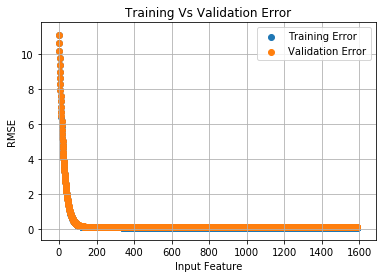

In [118]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

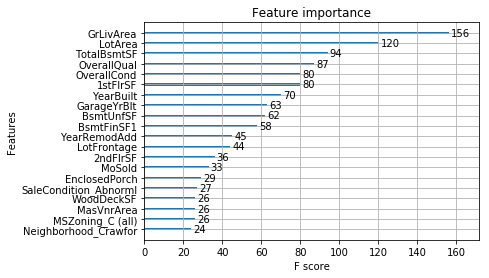

In [119]:
xgb.plot_importance(xgb1, max_num_features=20)

In [120]:
results = xgb1.predict(test)

In [121]:
results

array([11.708417 , 11.956502 , 12.14755  , ..., 11.940373 , 11.68243  ,
       12.3456335], dtype=float32)

In [122]:
predictions = np.expm1(results)

In [123]:
predictions

array([121589.84 , 155826.05 , 188630.31 , ..., 153332.94 , 118470.805,
       229952.75 ], dtype=float32)

In [124]:
output = pd.DataFrame(test_ID)

In [125]:
output['SalePrice'] = predictions

In [126]:
output.to_csv('submission.csv', index=False)

In [127]:
predictions = np.ceil(predictions/500) * 500

In [128]:
output['SalePrice'] = predictions

In [129]:
output.to_csv('submission_rounded.csv', index=False)